<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>


<font size="5"></br> UE Introduction au Machine Learning: Project ML </font></br></div>
</CENTER>
<CENTER>
<font size="3"></br></font></br></div>
</CENTER>
<CENTER>
<span style="color:blue"></span>
</CENTER>

**The objective of the project is to apply a Machine Learning model onto two different datasets:**
- Banknote Authentication Dataset
- Chronic Kidney Disease:


Workflow : 

1. Import the dataset
2. Clean the data, perform pre-processing
I Replace missing values by average or median values
I Center and normalize the data
3. Split the dataset
I Split between training set and test set
I Split the training set for cross-validation
4. Train the model (including feature selection)
5. Validate the model

**Objective:** collaboratively implement this workflow and apply it to different ML problems/datasets

# Import Data 



In [1]:
from library import *
import numpy as np
import scipy.io as sio
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [2]:
data_bank = pd.read_csv('./data/data_banknote_authentication.txt', sep=",", header=None)
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0) 

# Dataset Cleaning 
- Handle missing and categorical values
- Replace missing values by average or median values
- Center and normalize the data

In [3]:
data_bank_cleaned = clean_data_f(data_bank)
data_disease_cleaned = clean_data_f(data_disease)
#data_cleaned.head()
#data_disease_cleaned.head()

# Split the data set & PCA
- Split between training set and test set
- Split the training set for cross-validation

In [4]:
#Assumption of PCA : Data are gaussian distributed. We can check this assumption thanks to Shapiro Test 
p_values_bank = shapiro_test(data_bank_cleaned)
p_values_disease = shapiro_test(data_disease_cleaned)

print(f"{p_values_bank = }")
print(f"{p_values_disease = }")

p_values_bank = array([4.69058733e-12, 8.22495758e-15, 2.75911423e-25, 4.46953682e-27,
       0.00000000e+00])
p_values_disease = array([9.57961488e-10, 3.20041629e-08, 7.95709947e-18, 4.91368133e-15,
       4.75813730e-23, 5.67730916e-32, 8.25855380e-35, 1.55249802e-32,
       2.88500637e-35, 2.26948537e-37, 3.35469001e-23, 3.17993948e-25,
       2.58210696e-34, 3.11202951e-30, 2.81900249e-38, 2.36913285e-04,
       1.28110227e-14, 9.69508514e-19, 1.48061695e-20, 4.78966830e-29,
       1.75024397e-28, 9.30936425e-36, 3.92352420e-32, 1.55249802e-32,
       1.02025416e-33, 7.82202604e-29])


Comment: Au vu des valeurs de p value, l'hypothèse selon laquelle les distributions sont normales ne semble pas vérifiée bien que les résultats obtenus par PCA soient tout à fait satisfaisant par la suite 

In [8]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = split_data_df(data_bank_cleaned, test_size=1/3)
X_train_disease, X_test_disease, y_train_disease, y_test_disease, nb_features_disease = split_data_and_pca(data_disease_cleaned, test_size=1/3)

print(f"{nb_features_disease = }")

nb_features_disease = 3


# SVM Method

Cross Validation

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
data_cleaned

vari, skew, curt, entr = data_cleaned["Variance of WTI"].to_numpy(),data_cleaned["Skewness of WTI"].to_numpy(),data_cleaned["Curtosis of WTI"].to_numpy(),data_cleaned["Entropy of image"].to_numpy()
X = np.vstack((vari.T, skew.T, curt.T, entr.T)).T
y = data_cleaned["Class"].to_numpy() #pls use clean_data.iloc[:,-1]
X.dtype

dtype('float64')

In [ ]:
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import KFold

In [ ]:
classes_labels = [0, 1]

clf = svm.SVC()
train_size = 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, shuffle=True
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precisions, recalls = precision_recall_multilabels(y_test, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")

SyntaxError: invalid syntax (<fstring>, line 1)

In [ ]:
np.unique(y)

array([0, 1], dtype=int64)

In [ ]:
num_classes = len(np.unique(y))
classes_labels = [0, 1]


clfs = {
    "linear": svm.SVC(kernel="linear", C=1.0),
    "poly2": svm.SVC(kernel="poly", C=1.0, degree=2, gamma="scale", coef0=0.0),
    # "poly3": svm.SVC(kernel="poly", C=1.0, degree=3, gamma="scale", coef0=0.0),
    # "poly4": svm.SVC(kernel="poly", C=1.0, degree=4, gamma="scale", coef0=0.0),
    "rbf": svm.SVC(kernel="rbf", C=1.0, gamma="scale"),
    # "sigmoid": svm.SVC(kernel="sigmoid", C=1.0, gamma="scale", coef0=0.0),
}

clfs_results = {clf_name: {"precisions": None, "recalls": None} for clf_name in clfs}

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=34)

for clf_name, clf in clfs.items():
    precisions, recalls = kfold_precisions_recalls(X, y, classes_labels, clf, kf)

    clfs_results[clf_name]["precisions"] = precisions
    clfs_results[clf_name]["recalls"] = recalls

kfold_multimodels_report(clfs_results)

linear         
     precisions
                mean: [0.97 0.97]
                 std: [0.02 0.02]
        recalls
                mean: [1.00 1.00]
                 std: [0.01 0.01]
poly2          
     precisions
                mean: [0.81 0.81]
                 std: [0.06 0.06]
        recalls
                mean: [0.63 0.63]
                 std: [0.06 0.06]
rbf            
     precisions
                mean: [1.00 1.00]
                 std: [0.00 0.00]
        recalls
                mean: [1.00 1.00]
                 std: [0.00 0.00]


Text(0.5, 1.0, 'Prediction')

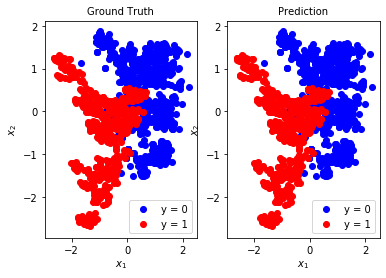

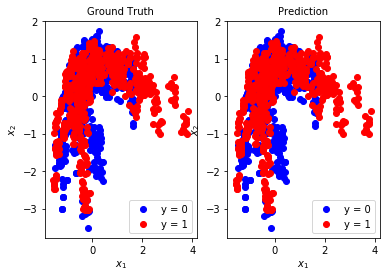

In [ ]:
# Plot variables
x1,x2, x3, x4 = vari, skew, curt, entr
# X1, X2, X3, X4 = meshgrid(linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10), linspace(x3.min(), x3.max(), 10), linspace(x4.min(), x4.max(), 10))
# X_rav = vstack((ravel(X1), ravel(X2), ravel(X3), ravel(X4))).T
X1, X2 = linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10)
X_rav = vstack((linspace(x1.min(), x1.max(), 10), linspace(x2.min(), x2.max(), 10), linspace(x3.min(), x3.max(), 10), linspace(x4.min(), x4.max(),10))).T
# fig = plt.figure()
# gs = fig.add_gridspec(3,2)
# ax1,ax2,ax3,ax4,ax5 = fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])
# axs=[ax2,ax3,ax4,ax5]
# depths=[1,2,3,4]

fig, (ax1,ax2) = plt.subplots(1,2)
y_pred = clf.predict(X)

# Plot Ground Truth
ax1.scatter(x1[y==0], x2[y==0], c='b')
ax1.scatter(x1[y==1], x2[y==1], c='r')
# plt.contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
ax1.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax1.set_xlabel("$x_1$", fontsize=10)
ax1.set_ylabel("$x_2$", fontsize=10)
ax1.set_title('Ground Truth', size=10)
ax2.scatter(x1[y_pred==0], x2[y_pred==0], c='b')
ax2.scatter(x1[y_pred==1], x2[y_pred==1], c='r')
# plt.contourf(X1, X2, clf.predict(X_rav), cmap='bwr', alpha=0.5)
ax2.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax2.set_xlabel("$x_1$", fontsize=10)
ax2.set_ylabel("$x_2$", fontsize=10)
ax2.set_title('Prediction', size=10)

fig, (ax1,ax2) = plt.subplots(1,2)
y_pred = clf.predict(X)

# Plot Ground Truth
ax1.scatter(x3[y==0], x4[y==0], c='b')
ax1.scatter(x3[y==1], x4[y==1], c='r')
# plt.contourf(X1, X2, Y, cmap='bwr', alpha=0.5)
ax1.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax1.set_xlabel("$x_1$", fontsize=10)
ax1.set_ylabel("$x_2$", fontsize=10)
ax1.set_title('Ground Truth', size=10)
ax2.scatter(x3[y_pred==0], x4[y_pred==0], c='b')
ax2.scatter(x3[y_pred==1], x4[y_pred==1], c='r')
# plt.contourf(X1, X2, clf.predict(X_rav), cmap='bwr', alpha=0.5)
ax2.legend(['y = 0', 'y = 1'], prop={'size': 10})
ax2.set_xlabel("$x_1$", fontsize=10)
ax2.set_ylabel("$x_2$", fontsize=10)
ax2.set_title('Prediction', size=10)


In [ ]:
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0)
#data_disease.columns = ["id","age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pvc","wc","rc","htn","dm","cad","appet","pe","ane","classification"]
data_disease

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
np.shape(data)[1]

5

In [ ]:
ilo = count_NaN(data_disease)
ilo



array([  0.,   9.,  12.,  47.,  46.,  49., 152.,  65.,   4.,   4.,  44.,
        19.,  17.,  87.,  88.,  52.,  70., 105., 130.,   2.,   2.,   2.,
         1.,   1.,   1.,   0.])

In [ ]:
data_disease_centered = center_and_normalize(data_disease)
data_disease_centered.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,3.910000e+02,3.880000e+02,3.530000e+02,3.540000e+02,3.510000e+02,3.560000e+02,3.810000e+02,3.830000e+02,3.130000e+02,3.120000e+02,3.480000e+02
mean,199.500000,2.172175e-17,-1.157436e-16,1.014270e-12,9.364763e-16,-6.183721e-16,-1.843095e-16,1.690103e-17,3.765482e-16,3.275690e-16,-6.410470e-16,-2.169401e-17
std,115.614301,1.001281e+00,1.001291e+00,1.001419e+00,1.001415e+00,1.001428e+00,1.001407e+00,1.001315e+00,1.001308e+00,1.001601e+00,1.001606e+00,1.001440e+00
min,0.000000,-2.885708e+00,-1.936857e+00,-2.173584e+00,-7.528679e-01,-4.101061e-01,-1.591967e+00,-1.108830e+00,-4.661019e-01,-1.280094e+01,-6.671023e-01,-3.241109e+00
25%,99.750000,-5.530393e-01,-4.733701e-01,-1.297699e+00,-7.528679e-01,-4.101061e-01,-6.193803e-01,-6.032459e-01,-3.788971e-01,-2.433340e-01,-2.594231e-01,-7.655198e-01
50%,199.500000,2.050779e-01,2.583733e-01,4.540705e-01,-7.528679e-01,-4.101061e-01,-3.414983e-01,-3.058433e-01,-3.091332e-01,4.534651e-02,-7.126345e-02,4.248496e-02
75%,299.250000,7.590867e-01,2.583733e-01,4.540705e-01,7.277723e-01,-4.101061e-01,1.890038e-01,1.700008e-01,-4.751867e-02,4.302539e-01,8.553625e-02,8.504897e-01
max,399.000000,2.246163e+00,7.575807e+00,1.329955e+00,2.948733e+00,4.145186e+00,4.319341e+00,6.613723e+00,1.271927e+01,2.451017e+00,1.328807e+01,1.813219e+00


In [ ]:
data_disease.at[3,'id'] == data_disease['id'][3]

True

In [ ]:
data_disease = pd.read_csv('./data/kidney_disease.csv', sep=",", header=0)
data_disease_cleaned = clean_data_f(data_disease)

In [ ]:
data_disease_cleaned.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,-6.604439e-16,-4.282685e-16,1.449401e-12,-1.336153e-15,9.961476e-16,0.117500,0.190000,0.105000,0.055000,...,16.117500,26.782500,14.965000,0.632500,0.697500,0.095000,0.205000,0.190000,0.150000,0.755000
std,115.614301,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.322418,0.392792,0.306937,0.228266,...,11.477938,24.949577,16.358416,0.482728,0.567273,0.310186,0.404207,0.392792,0.357519,0.968152
min,0.000000,-2.918730e+00,-1.966580e+00,-2.313764e+00,-8.002896e-01,-4.377969e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,-5.593680e-01,-4.806345e-01,-4.490180e-01,-8.002896e-01,-4.377969e-01,0.000000,0.000000,0.000000,0.000000,...,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,1.484407e-01,1.311692e-01,4.968680e-13,-1.333816e-02,-4.377969e-01,0.000000,0.000000,0.000000,0.000000,...,12.000000,18.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,7.382812e-01,2.623384e-01,4.833547e-01,7.736133e-01,6.478645e-16,0.000000,0.000000,0.000000,0.000000,...,24.000000,44.000000,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,2.271867e+00,7.692067e+00,1.415727e+00,3.134468e+00,4.425074e+00,1.000000,1.000000,1.000000,1.000000,...,43.000000,91.000000,48.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
ds=data_disease_cleaned

In [ ]:
data_disease_cleaned.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
2,2,0.620313,0.262338,-1.381391,0.773613,2.479925,0,0,0,0,...,2,2,0,1,0,0,1,0,1,0
3,3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,0,1,1,0,...,3,3,1,0,1,0,1,1,1,0
4,4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,0,0,0,0,...,4,4,2,1,1,0,0,0,0,0


In [ ]:
ds=dataset_to_numpy(data_disease_cleaned)
X = ds[:,:-2]
y = ds[:,-1]
classes_labels = [0, 1]
num_classes = len(np.unique(y))
classes_labels = [0, 1]

clf = svm.SVC()
train_size = 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, shuffle=True
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precisions, recalls = precision_recall_multilabels(y_test, y_pred, classes_labels)

print(f"{precisions = }")
print(f"{   recalls = }")
kf = KFold(n_splits=10, shuffle=True, random_state=34)

for clf_name, clf in clfs.items():
    precisions, recalls = kfold_precisions_recalls(X, y, classes_labels, clf, kf)

    clfs_results[clf_name]["precisions"] = precisions
    clfs_results[clf_name]["recalls"] = recalls

kfold_multimodels_report(clfs_results)


SyntaxError: invalid syntax (<fstring>, line 1)

# Logistic Regression

In [ ]:
Logistic_regression(data_disease)

C:\Users\jujul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.8763520678685047, 0.9336996336996337)

# KNN

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
test_size = 0.3
for n in range(1,Ks):
    
    #Train Model and Predict  
    X_train, X_test, y_train, y_test = split_data(data_disease_cleaned, test_size)
    neigh  = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.975     ,
       0.96666667, 0.99166667, 0.98333333, 0.975     ])

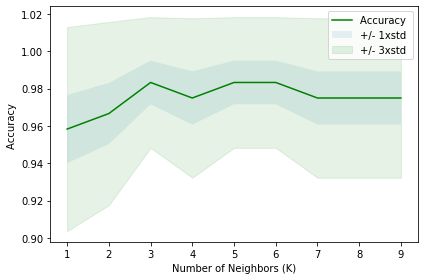

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9833333333333333 with k= 3


# Decision Forest

#### Bank dataset Train and Test :

In [ ]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = split_data_df(data_cleaned, test_size=0.3)

X_train_disease, X_test_disease, y_train_disease, y_test_disease = split_data_df(data_disease_cleaned, test_size=0.3)

NameError: name 'split_data_df' is not defined

In [ ]:
# Training Decision Trees
Bank_Class_DeciForest = trainDecisionForest(X_train_bank, y_train_bank, 100)
Bank_Class_AdaBoost = trainAdaBoost(X_train_bank, y_train_bank, 100)

# Test Decision Trees
Bank_Predic_DeciForest = testDecisionForest(Bank_Class_DeciForest, X_test_bank)
Bank_Predic_AdaBoost = testAdaBoost(Bank_Class_AdaBoost, X_test_bank)

Validation Model : Decision Forest
Your model has a log_loss of : 0.2515017669345219%
Your model has an accuracy of : 99.27184466019418%
Your model has a recall of : 100.0%
Your model has a F1 score = 0.9916897506925207 


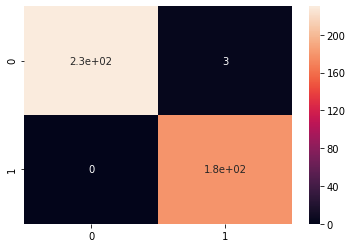

In [ ]:
# Decision Trees Validation
Bank_Conf_DeciForest = confusionMatrix(y_test_bank, Bank_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_bank, Bank_Predic_DeciForest)


Validation Model : Ada Boost
Your model has a log_loss of : 0.08383198154104635%
Your model has an accuracy of : 99.75728155339806%
Your model has a recall of : 99.4413407821229%
Your model has a F1 score = 0.9971988795518207 


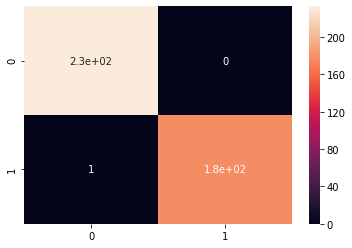

In [ ]:
Bank_Conf_AdaBoost = confusionMatrix(y_test_bank, Bank_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_bank, Bank_Predic_AdaBoost)

In [ ]:
# Decision Trees Graph
plotTree(Bank_Class_DeciForest, data)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# Training Decision Trees
Disease_Class_DeciForest = trainDecisionForest(X_train_disease, y_train_disease, 100)
Disease_Class_AdaBoost = trainAdaBoost(X_train_disease, y_train_disease, 100)

# Test Decision Trees
Disease_Predic_DeciForest = testDecisionForest(Disease_Class_DeciForest, X_test_disease)
Disease_Predic_AdaBoost = testAdaBoost(Disease_Class_AdaBoost, X_test_disease)

Validation Model : Decision Forest


ValueError: y_true and y_pred contain different number of classes 3, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2]

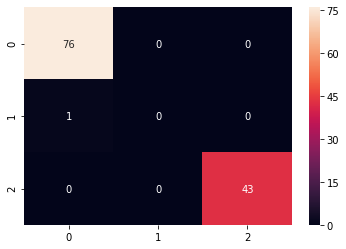

In [ ]:
# Decision Trees Validation
Disease_Conf_DeciForest = confusionMatrix(y_test_disease, Disease_Predic_DeciForest)

print('Validation Model : Decision Forest')
validateModel(y_test_disease, Disease_Predic_DeciForest)

Validation Model : Ada Boost


ValueError: y_true and y_pred contain different number of classes 3, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2]

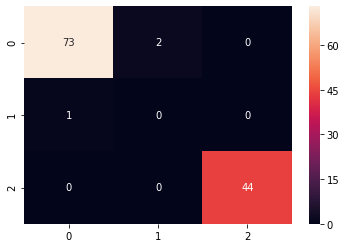

In [ ]:
Bank_Conf_AdaBoost = confusionMatrix(y_test_disease, Disease_Predic_AdaBoost)

print('Validation Model : Ada Boost')
validateModel(y_test_disease, Disease_Predic_AdaBoost)

In [ ]:
# Decision Trees Graph
plotTree(Disease_Class_DeciForest, data)